In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [8]:
df1=sns.load_dataset("iris")

In [9]:
df=df1.copy()

In [10]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

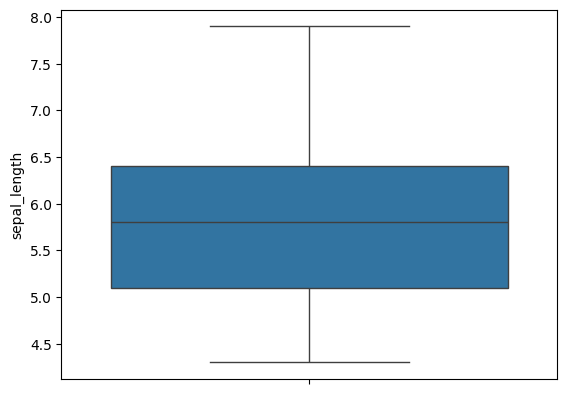

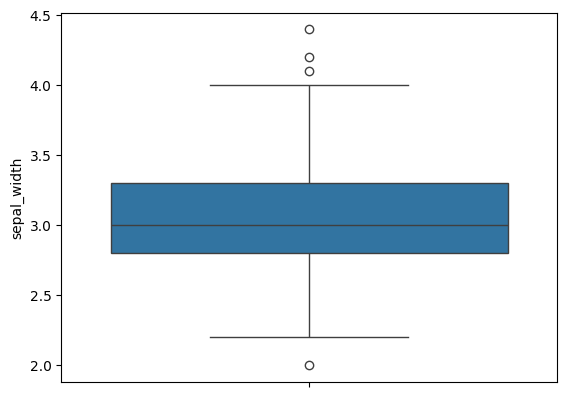

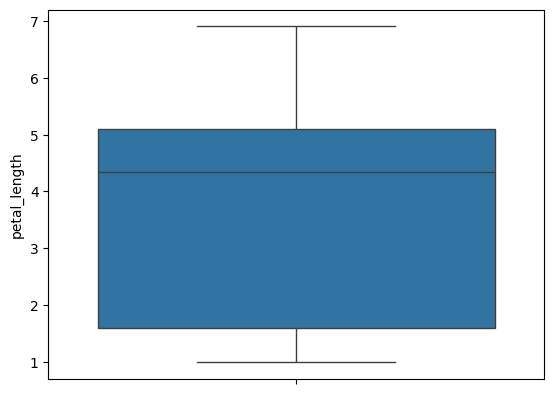

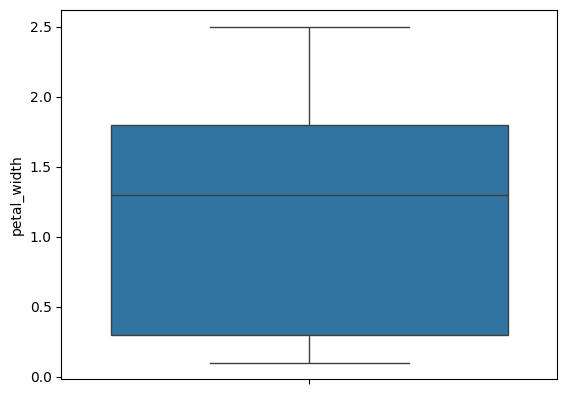

In [12]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(df[i])
    plt.show()

In [15]:
def out(col):
    q1 , q3 = np.percentile(col,(25,75))
    iqr = q3-q1
    ll = q1-1.5*iqr
    ul = q3+1.5*iqr
    return ll , ul

In [16]:
for i in df.select_dtypes(include="number").columns:
    ll, ul = out(df[i])
    df[i]=np.where(df[i]<ll,ll,df[i])
    df[i]=np.where(df[i]>ul , ul ,df[i])
        

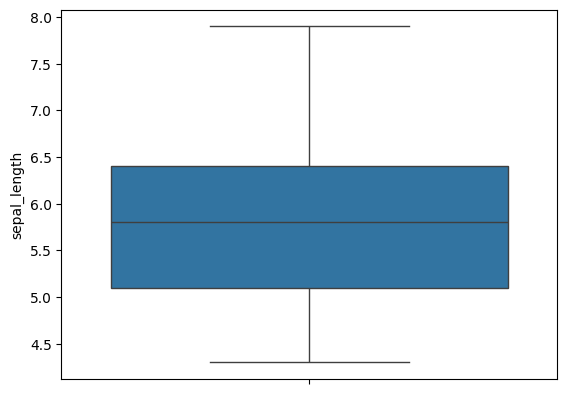

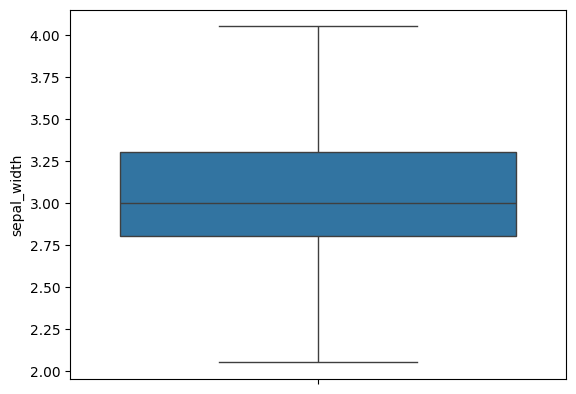

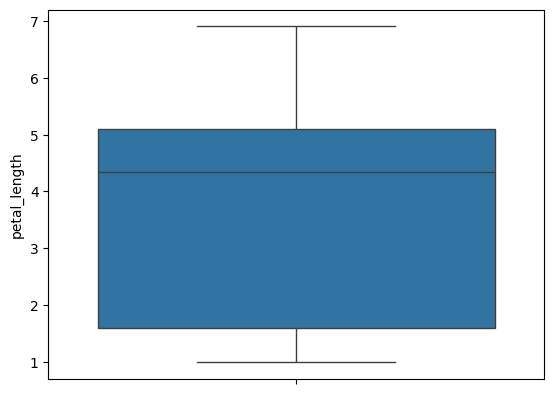

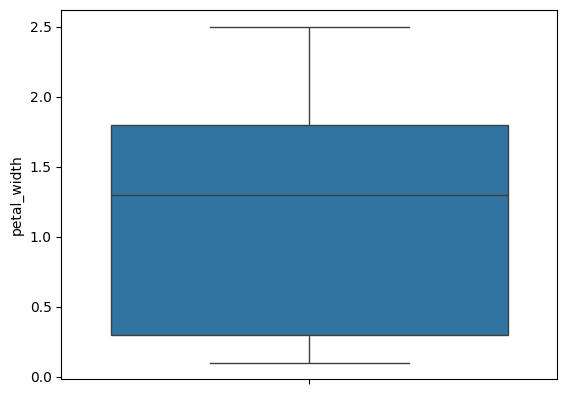

In [17]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(df[i])
    plt.show()

In [18]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [25]:
df["species"][80:120]

80     versicolor
81     versicolor
82     versicolor
83     versicolor
84     versicolor
85     versicolor
86     versicolor
87     versicolor
88     versicolor
89     versicolor
90     versicolor
91     versicolor
92     versicolor
93     versicolor
94     versicolor
95     versicolor
96     versicolor
97     versicolor
98     versicolor
99     versicolor
100     virginica
101     virginica
102     virginica
103     virginica
104     virginica
105     virginica
106     virginica
107     virginica
108     virginica
109     virginica
110     virginica
111     virginica
112     virginica
113     virginica
114     virginica
115     virginica
116     virginica
117     virginica
118     virginica
119     virginica
Name: species, dtype: object

In [29]:
d={"setosa":0,"versicolor":1,"virginica":2}
df["species"] = df["species"].map(d)

In [30]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [33]:
x=df.drop(columns=["species"])
y=df["species"]

In [34]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [38]:
%%capture
pip install tensorflow

In [45]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
# build a model
model = Sequential()

model.add(Dense(150,activation="relu",input_dim = x_train.shape[1]))
model.add(Dense(75,activation="relu"))
model.add(Dense(25,activation="relu"))
model.add(Dense(7,activation="relu"))
model.add(Dense(3,activation="sigmoid"))

c:\Users\sowmya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
from tensorflow.keras.layers import Input



# Build the model
model = Sequential()

# Define the input layer explicitly using Input(shape=...)
model.add(Input(shape=(x_train.shape[1],)))  # Define input shape here
model.add(Dense(250, activation="relu"))  # First hidden layer
model.add(Dense(75, activation="relu"))  # Second hidden layer
model.add(Dense(50, activation="relu"))  # Third hidden layer
model.add(Dense(1, activation="sigmoid"))  # Output layer for binary classification


In [83]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [84]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 250)            │         1,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 75)             │        18,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,926 (93.46 KB)

 Trainable params: 23,926 (93.46 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
history=model.fit(x_train,y_train,epochs=20,batch_size=15,validation_split=0.2)

Epoch 1/20


c:\Users\sowmya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6333 - loss: 0.0000e+00

c:\Users\sowmya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.6970 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7061 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7220 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7209 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6702 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7027 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7365 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.0000e+00
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7358 - loss: 0.00

In [81]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6333 - loss: 0.0000e+00


In [82]:
test_accuracy

0.6333333253860474

In [86]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Assume you already have x and y defined
# x = input features (shape: [samples, features])
# y = target labels (shape: [samples])

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# One-hot encode the target labels if not already one-hot encoded
y_train = to_categorical(y_train, num_classes=7)  # Assuming 7 classes
y_test = to_categorical(y_test, num_classes=7)

# Build the model
model = Sequential()

# Define the input layer explicitly using Input(shape=...)
model.add(Input(shape=(x_train.shape[1],)))  # Define input shape (number of features)
model.add(Dense(250, activation="relu"))  # First hidden layer
model.add(Dense(75, activation="relu"))   # Second hidden layer
model.add(Dense(50, activation="relu"))   # Third hidden layer
model.add(Dense(7, activation="softmax"))  # Output layer for multi-class classification (7 classes)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Display the model architecture
model.summary()

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=15, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 250)            │         1,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 75)             │        18,825 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 50)             │         3,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 7)              │           357 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,232 (94.66 KB)

 Trainable params: 24,232 (94.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2074 - loss: 1.6070 - val_accuracy: 0.5000 - val_loss: 1.1881
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7859 - loss: 1.0896 - val_accuracy: 0.9167 - val_loss: 0.8662
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7363 - loss: 0.8058 - val_accuracy: 1.0000 - val_loss: 0.6712
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8043 - loss: 0.6531 - val_accuracy: 0.5000 - val_loss: 0.6445
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8648 - loss: 0.4897 - val_accuracy: 0.9167 - val_loss: 0.4612
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8770 - loss: 0.4550 - val_accuracy: 0.8750 - val_loss: 0.4827
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9511 - loss: 0.4273 - val_accuracy: 1.0000 - val_loss: 0.3747
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9561 - loss: 0.3341 - val_accuracy: 0.9583 - val_loss: 0.3822